In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gseapy as gp
import drug2cell as d2c

# Generate Global Ranking 1

In [10]:
samples = ['MEND151','MEND156','MEND158','MEND160','MEND161']
threshold = 0.5
top_genes = 40
path_to_data = 'MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/'
fig_size = (15, 15)

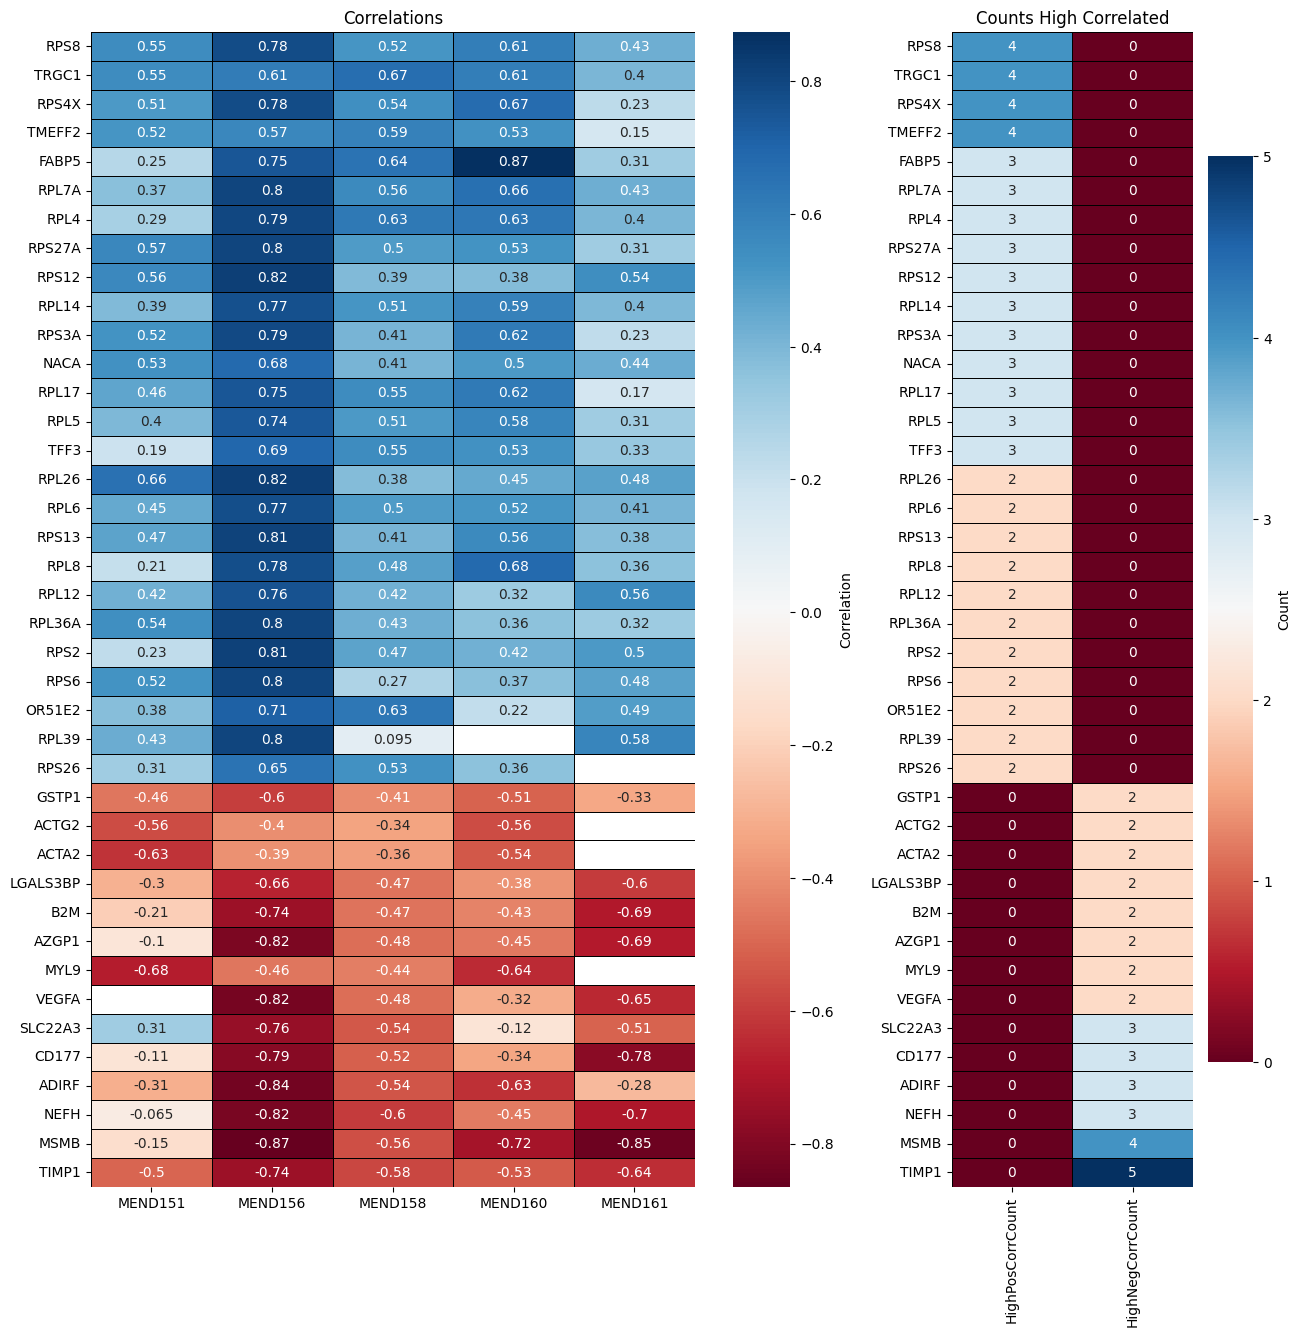

In [11]:
result_df = None

for sample in samples:
    data = pd.read_csv(path_to_data + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')

result_df['Average'] = result_df.mean(axis=1)
result_df['HighPosCorrCount'] = result_df.drop(columns='Average').gt(threshold).sum(axis=1)
result_df['HighNegCorrCount'] = result_df.drop(columns='Average').lt(-threshold).sum(axis=1)
result_df['NewRank'] = result_df['HighPosCorrCount'] - result_df['HighNegCorrCount']

result_df['HighCorr'] = result_df[['HighPosCorrCount', 'HighNegCorrCount']].max(axis=1)

result_df_sorted = result_df.sort_values(by=['HighCorr','Average'], ascending=False, key = abs)[:top_genes]
correlated_genes = result_df_sorted.index
result_df_sorted = result_df_sorted.sort_values(by=['NewRank','HighPosCorrCount','Average','HighNegCorrCount'], ascending=[False,False,False,True])
result_df_sorted = result_df_sorted.drop(columns=['NewRank','HighCorr','Average'])

padding_column = pd.Series([np.nan] * len(result_df), name='padding')
result_df_sorted.insert(result_df_sorted.columns.get_loc('HighPosCorrCount'), 'padding', padding_column)

cols_colormap1 = samples
cols_colormap2 = ['HighPosCorrCount', 'HighNegCorrCount']
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fig_size, gridspec_kw={'width_ratios': [len(cols_colormap1), len(cols_colormap2)]})

# Plot the first set of columns with the first colormap
sns.heatmap(result_df_sorted[cols_colormap1], ax=axes[0], cmap='RdBu', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlations')

# Plot the second set of columns with the second colormap
sns.heatmap(result_df_sorted[cols_colormap2], ax=axes[1], cmap='RdBu', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Count'})
axes[1].set_title('Counts High Correlated')


# Show the plot
plt.show()

# Generate Global Ranking 2

In [5]:
# Variables (change as you like/need)
samples = ['MEND151','MEND156','MEND158','MEND160','MEND161']
top_genes = 20
path_to_data = 'MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/'
fig_size = (15, 15)

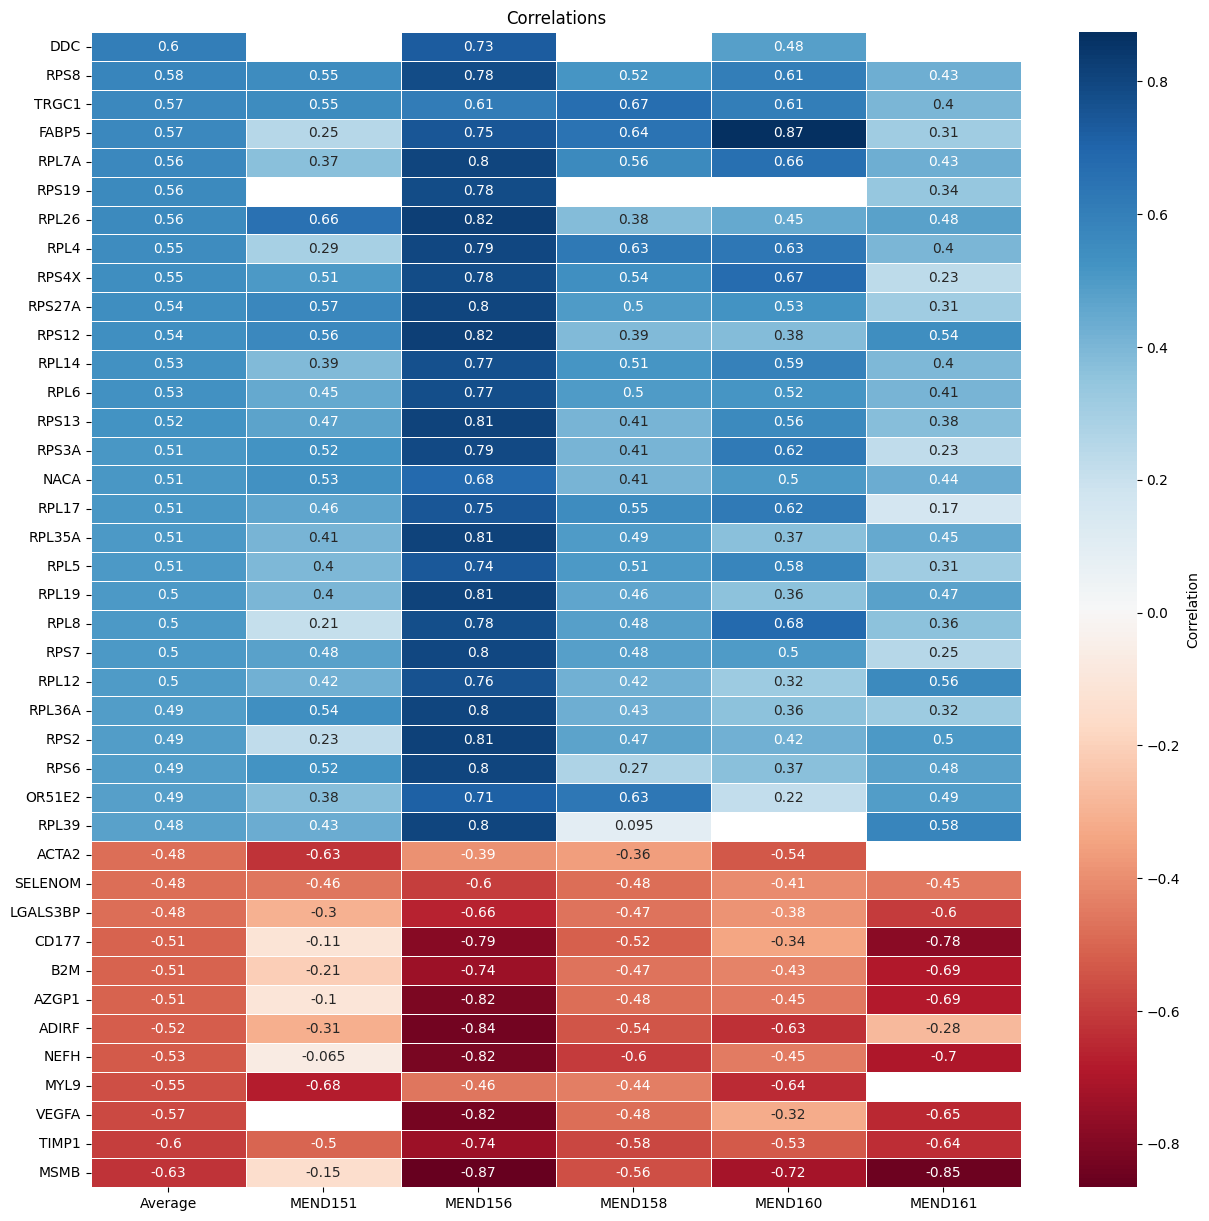

In [14]:
# Run
result_df = None
for sample in samples:
    data = pd.read_csv(path_to_data + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')
result_df['Average'] = result_df.mean(axis=1)
result_df_sorted = result_df.sort_values(by='Average', ascending=False, key = abs)[:top_genes]
correlated_genes = result_df_sorted.index
result_df_sorted = result_df_sorted.sort_values(by='Average', ascending=False)
cols = ['Average'] + [col for col in result_df_sorted.columns if col != 'Average']
result_df_sorted = result_df_sorted[cols]

plt.figure(figsize=fig_size)
sns.heatmap(result_df_sorted, cmap="RdBu", annot=True, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlations')
plt.show()